<img class="thumb_g_article" data-org-src="https://t1.daumcdn.net/news/202105/21/bloter/20210521202258108bqtp.gif" data-org-width="680" dmcf-mid="cCD3JaWEk0" dmcf-mtype="image" height="auto" src="https://media.giphy.com/media/HEGquweMjPqMRhg3Bj/giphy.gif" width="8000">

# Predict which passengers are transported to an alternate dimension
<br>

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.<br> To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.
<br>
To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
<br>

<img src="https://i.ibb.co/zhr5JNM/2022-02-25-144626.jpg" alt="2022-02-25-144626" border="0">
<br>
# To Anyone reading This Notebook.
- I hope this Notebook is useful for studying Marchine Learning.<br>I think if you learn hardly you will get great Gift.<br>If you get any Question or give FeedBack, Put comment!! I will answer in detail

<b>- If useful, Don't forget vote!</b>




# Content
<b>- Load Dataset</b>

<b>- Data Visualization and Data Explore</b>

<b>- Data PreProcessing</b>
- OneHotEncoding vs LabelEncoding How to choose?!
    
<b>- Data Visualization</b>

<b>- Anomaly Detection</b>
- U-MAP
- T-SNE

<b>- Pycaret Modeling</b>

<b>- Scikit-Learn Modeling    (RandomForest, CatBoost, AdaBoost, XGBoost, GradientBoost, LightBoost)</b>
- Before Scaling
- After Scaling
- Votting
- Stacking

<b>- Reference</b>

**Features**

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Load Dataset</font></left></h3>

In [ ]:
!pip install pycaret

# Load Dataset
- The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames.

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from pycaret.classification import *
from pycaret.anomaly import *

# Describing Data
<b>- Categorical Feature : HomePlanet, CryoSleep, Cabin, Destination, VIP, Name</b>

<b>- Numerical Feature : RoomService, FoodCount, ShoppingMall, Spa, VRDeck</b>
<br>

* (PassengerId is unique Id for each passenger. It doesn't importance making Model.)

In [ ]:
train_df = pd.read_csv('../input/spaceship-titanic/train.csv')
test_df = pd.read_csv('../input/spaceship-titanic/test.csv')

train_df.head()

In [ ]:
train_df.describe()

<b>Train Data, Test Data have a lot of NaN. We have to do some prprocessing.</b>

In [ ]:
train_df.info()
print()
print('--------'*6)
test_df.info()

# Pivoting Features
- HomePlanet : Since most of Data is Earth, We will replace NaN values with Earth.
- Destionation : Since most of Data is Earth, We will replace NaN values with TRAPPIST-1e.
- VIP : Most of them are False, so we will relpace them with False as well
<br>

- Cabin : Cabin is consists of Deck, Num, Side. It can be divided and analyzed
- CryoSleep : NaN replace False as well.

In [ ]:
print(train_df.columns.values)
print('------'*6)
print(train_df['HomePlanet'].value_counts())
print('------'*6)
print(train_df['Destination'].value_counts())
print('------'*6)
print(train_df['VIP'].value_counts())
print('------'*6)
print(train_df['Transported'].value_counts())
print('------'*6)
print(train_df['Cabin'].str[0].value_counts())
print('------'*6)
print(train_df['CryoSleep'].value_counts())

In [ ]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index = False).mean().sort_values(by = 'Transported', ascending = False)

In [ ]:
train_df[['Destination', 'Transported']].groupby(['Destination'], as_index = False).mean().sort_values(by = 'Transported', ascending = False)

In [ ]:
train_df[['VIP', 'Transported']].groupby(['VIP'], as_index = False).mean().sort_values(by = 'Transported', ascending = False)

<b>The ratio of the target value may be different for each age distribution, so we use the cut of pandas to figure it out.</b>
<br>
But.. There is no many difference in the ratio. I'll put it on hold for now

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 7)
print(train_df[['AgeBand', 'Transported']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True))
train_df = train_df.drop('AgeBand', axis = 1)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Data Visualization</font></left></h3>

# Data Visualiztion and Analyze Data
- It's can bring you insight that are not numerically invisible.


In [ ]:
total = 4602 + 2131 + 1759
ear = 4602
eur = 2131
mars = 1759
labels = 'Earth', 'Europa','Mars' 
sizes = [ear/total*100, eur/total*100, mars/total*100]
explode = (0.1, 0, 0.1)

total_de = 5915 + 1800 + 796
TRAPPIST = 5915
Cancri = 1800
PSOJ318 = 796
labels_1 = 'TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22'
sizes_1 = [TRAPPIST/total_de*100, Cancri/total_de*100, PSOJ318/total_de*100]
explode_1 = (0, 0.2, 0)
colors = ['#ff9999','#66b3ff','#99ff99' ]
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90,  textprops={'fontsize': 14}, colors=colors)
plt.axis('equal')
plt.title('HomePlanet Ratio')
plt.subplot(1, 2, 2)
plt.pie(sizes_1, explode = explode_1, labels = labels_1,  autopct='%1.1f%%',
        shadow=True, startangle=90,  textprops={'fontsize': 14}, colors=colors)
plt.axis('equal')
plt.title('Destination Ratio')
plt.suptitle('HomePlanet & Destination Ratio', fontsize = 25)
plt.show()

In [ ]:
plt.figure(figsize = (20, 15))
heat_map = train_df.corr()
mask = np.triu(np.ones_like(heat_map, dtype=bool))
heatmap = sns.heatmap(heat_map, annot = True, mask = mask, cmap = 'Pastel1_r')
heatmap.set_title('Feature Correlation')
plt.show()

In [ ]:
plt.figure(figsize = (20, 15 ))
sns.set_theme(style = 'whitegrid')
sns.set(font_scale=1.5)
tmp = sns.violinplot(data = train_df, x = 'HomePlanet', y = 'Age', hue = 'Transported',
               split = True, inner = 'quart', linewidth = 1, palette='Spectral')
sns.despine(left = True)
plt.show()

In [ ]:
fig = px.scatter_3d(train_df, x = 'Spa', y = 'VRDeck', z = 'RoomService', color = 'RoomService')
fig.show()
#RoomService, Spa, VRDeck

In [ ]:
fig = px.scatter_3d(train_df, x = 'Name', y = 'VIP', z = 'Age', color = 'Age')
fig.show()

In [ ]:
g = sns.FacetGrid(train_df, col = 'Transported', height = 4.2, aspect = 3.6)
sns.set(font_scale= 2)
g.map(plt.hist, 'Age', bins = 20)
plt.show()

In [ ]:
grid = sns.FacetGrid(train_df, col = 'Transported', row = 'HomePlanet', height = 4.2, aspect = 3.6)
sns.set(font_scale= 2)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend()
plt.show()

In [ ]:
grid = sns.FacetGrid(train_df, col = 'Transported', row = 'VIP', height = 4.2, aspect = 3.6)
grid.map(plt.hist, 'Age', alpha = .5, bins = 20)
grid.add_legend()
plt.show()

In [ ]:
bill_data = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for data in bill_data:
    print(train_df[data].value_counts().head(5))
    print()

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Data PreProcessing</font></left></h3>

# Data PreProcessing
- To train model, We need to conver the categorical data into numeric form. We will use, Label Encoder.
- I will divid Cabin to Deck, Num and side
- PassengerId, Cabin, Name is not Importance to train model. therefore drop Features

### How to choose OneHotEncoding between LabelEncoding?!
<br>

<b>We apply One-Hot-Encoding when:</b>
- The Categorical feature is not ordinal
- The number of categorical features is less so one-hot encoding can be effectively applied

<br>

<b>We apply Label Encoding when:</b>
- The categorical feature is ordinal (like Primary school, high school)
- The number of categories is quite large as one-hot encoding can lead to high memory consumption

<br>
<b>OneHotEncodingFeature</b>

- HomePlanet
- CryoSleep
- Cabin (Side)
- Destination
- VIP

<br>
<b>LabelEncodingFeature</b>

- Cabin(Deck)
- Name  (cause.2) (many nuinque values)


In [ ]:
missing_feature_freq = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', \
                        'VIP', 'Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
missing_feature_mean = ['Age']
sub_id = test_df['PassengerId']

def missing_fill(df):
    for feature in missing_feature_freq:
        most_freq = df[feature].value_counts().index[0]
        df[feature] = df[feature].fillna(most_freq)
    
    for feature in missing_feature_mean:
        df[feature] = df[feature].fillna(df[feature].mean())
    
    return df

def extract_deck(s):
    return s.split('/')[0]

def extract_num(s):
    return s.split('/')[1]

def extract_side(s):
    return s.split('/')[2]

def extract_surname(s):
    return s.split()[1]

def drop_features(df):
    drop_feature = ['PassengerId', 'Cabin', 'Name']
    for ft in drop_feature:
        df = df.drop(ft, axis = 1)
    return df
def encoder(df):
#     dum_features = ['CryoSleep', 'HomePlanet', 'Destination', 'VIP', 'Deck', 'Side', 'surname'] # surname
#     ohe_features = ['CryoSleep', 'HomePlanet', 'Destination', 'VIP', 'Side']
    bool_features = ['CryoSleep', 'VIP']
    dum_features = ['Deck', 'surname']
    
    for bool_ft in bool_features:
        df[bool_ft] = df[bool_ft].astype('str')
        
    for dum in dum_features:
        le = LabelEncoder()
        le.fit(df[dum])
        df[dum] = le.transform(df[dum])     
    df['Num'] = df['Num'].astype('int')
    
    df = pd.get_dummies(df)
    return df

def Make_feature(df):
    df = missing_fill(df)
    df['Total Charge'] = np.log1p(df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck'])
    df['Deck'] = df['Cabin'].apply(extract_deck)
    df['Num'] = df['Cabin'].apply(extract_num)
    df['Side'] = df['Cabin'].apply(extract_side)
    df['surname'] = df['Name'].apply(extract_surname)
    df = drop_features(df)
    df = encoder(df)
    
    return df

train_df = Make_feature(train_df)
test_df = Make_feature(test_df)

In [ ]:
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.hist(np.log1p(train_df['Total Charge']), bins = 100)
plt.title('Train Data Total Charge')
plt.subplot(1, 2, 2)
plt.hist(np.log1p(test_df['Total Charge']), bins = 100)
plt.title('Test Data Total Charge')
plt.suptitle('Train & Test Data Total Charge', fontsize = 20)
plt.show()

In [ ]:
# # Total Charge

# grid = sns.FacetGrid(train_df, col = 'VIP', hue = 'Transported', height = 5, aspect = 3)
# grid.map(plt.hist, 'Total Charge', alpha = .5, bins = 20)
# grid.add_legend()
# plt.show()

In [ ]:
# grid = sns.FacetGrid(train_df, row = 'HomePlanet', col = 'Transported', height = 5, aspect = 3)
# grid.map(sns.barplot, 'VIP',  'Total Charge', alpha = .5, order = None)
# grid.add_legend()
# plt.show()

In [ ]:
sns.set(font_scale = 0.6)
plt.figure(figsize = (30, 20))
heat_map = train_df.corr()
# mask = np.triu(np.ones_like(heat_map, dtype=bool))
heatmap = sns.heatmap(heat_map, annot = True, cmap = 'Pastel1_r')  #  mask = mask,|
heatmap.set_title('Feature Correlation')
plt.show()

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Anomaly Detection with Pycaret</font></left></h3>

# Anomaly Detection

In data analysis, anomaly detection (also referred to as outlier detection) is generally understood to be the identification of rare items, events or observations which deviate significantly from the majority of the data. Such examples may arouse suspicions of being generated by a different mechanism, or appear inconsistent with the data.
Typically the anomalous items will translate to some kind of problem such as bank fraud, a structural defect, medical problems or errors in a text. Anomalies are also referred to as outliers, novelties, noise, deviations and exceptions.

In [ ]:
pycaret.anomaly.setup(
    data=train_df,
    silent=True)

In [ ]:
pca = pycaret.anomaly.create_model('pca')
pca_df = pycaret.anomaly.assign_model(pca)
pca_df[pca_df['Anomaly'] == 1].sort_values(by='Anomaly_Score', ascending=False).head()
# Anomaly = 1 mean Outlier and 0 mean inlier

In [ ]:
tuned_pca = tune_model(model = 'pca', supervised_target = 'Transported')

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction. The algorithm is founded on three assumptions about the data

1. The data is uniformly distributed on Riemannian manifold
2. The Riemannian metric is locally constant
3. The manifold is locally connected.

In [ ]:
plt.style.use("dark_background")
plot_model(tuned_pca,plot='umap')

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map.

In [ ]:
plot_model(tuned_pca,plot='tsne')

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Modeling with Pycaret</font></left></h3>

# Modeling
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.<br> It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.
<br>

Link : https://pycaret.gitbook.io/docs/

In [ ]:
train_df

In [ ]:
from pycaret.classification import *
model = setup(data = train_df, target = 'Transported', session_id=123, silent = True)

In [ ]:
# top4_models = compare_models(fold = 10, n_select= 4)

In [ ]:
# blender = blend_models(top4_models)

In [ ]:
# tmp = tune_model(blender, n_iter = 100)

<b>Model Score

<a href="https://ibb.co/9vH7VbS"><img src="https://i.ibb.co/z5Vz7XD/2022-02-24-221944.jpg" alt="2022-02-24-221944" border="0"></a>

In [ ]:
# tmp_predict = predict_model(tmp, data = test_df)
# tmp_predict.head()

# submission = pd.DataFrame({
#     'PassengerId' : sub_id,
#     'Transported' : tmp_predict['Label']
# })
# submission.to_csv('submission.csv', index = False)

In [ ]:
catboost_model = create_model('catboost', fold = 10, round = 6)

In [ ]:
# sns.set(font_scale= 2)
# plt.figure(figsize = (20, 10))
# plot_model(catboost_model, plot = 'auc')

In [ ]:
interpret_model(catboost_model)

In [ ]:
# cat_tune = tune_model(catboost_model, n_iter = 20)

<a href="https://ibb.co/R91rqc6"><img src="https://i.ibb.co/Y36nxhd/2022-02-24-225001.jpg" alt="2022-02-24-225001" border="0"></a>

In [ ]:
# tmp_predict = predict_model(cat_tune, data = test_df)

# submission = pd.DataFrame({
#     'PassengerId' : sub_id,
#     'Transported' : tmp_predict['Label']
# })
# submission.to_csv('submission1.csv', index = False)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Scikit-Learn Modeling</font></left></h3>

In [ ]:
def prepare_label(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values).reshape(len(values), 1)
    return integer_encoded, label_encoder

target, label_encoder = prepare_label(train_df['Transported'])
train_df['Transported'] = target

In [ ]:
def ACU(true, pred):
    score = np.mean(true == pred)
    return score

In [ ]:
def Kfold(model, train):
    accuracy_item = []
    str_fold = StratifiedKFold(n_splits = 10)
    
    n_iter = 0
    
    for t, v in str_fold.split(train, train['Transported']):
        train_data = train.iloc[t]
        val_data = train.iloc[v]
        
        train_X = train_data.drop('Transported', axis = 1)
        train_Y = train_data['Transported']
        
        val_X = val_data.drop('Transported', axis = 1)
        val_Y = val_data['Transported']
        
        model.fit(train_X, train_Y)
        score = ACU(val_Y, model.predict(val_X))
        
        accuracy_item.append(score)
        n_iter += 1
    return np.mean(accuracy_item)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Before Scaling</font></left></h3>

In [ ]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=12, min_samples_leaf=8, min_samples_split=20, n_estimators=300),
    GradientBoostingClassifier(),
    XGBClassifier(eval_metric = 'logloss', 
                              max_depth = 5, 
                              min_child_weight = 3, 
                               gamma = 3, 
                               colsample_bytree = 0.5, 
                               n_estimators=700),
    LGBMClassifier(n_estimators=600, max_bin=400, num_leaves=24),
    CatBoostClassifier(silent=True, depth=6, l2_leaf_reg=7, learning_rate=0.1, n_estimators=500),
    ExtraTreesClassifier(max_depth=25, n_estimators=320),
    AdaBoostClassifier()
]
print('Scaling Before')
for model in models:
    print(f'{type(model).__name__} score : {Kfold(model, train_df)}')

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>After Scaling</font></left></h3>

# RandomForest
- reference : https://en.wikipedia.org/wiki/Random_forest

In [ ]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_depth": [3, 5, 7, 9, 11, 12],
    "min_samples_leaf" : [18, 19, 20],
    "min_samples_split" : [8, 9, 10]
}

tr = train_df.drop('Transported', axis = 1)
tg = train_df['Transported']

RFC_Model = RandomForestClassifier()
RFC_grid = GridSearchCV(RFC_Model, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs= -1)
RFC_grid.fit(tr, tg)
print('Best Parameters : ', RFC_grid.best_params_)
print()
print('Best Accuracy : ', RFC_grid.best_score_)

# CatBoost
- reference : https://en.wikipedia.org/wiki/Catboost

In [ ]:
parameters = {
    'iterations': [5, 10, 15,],
    'learning_rate': [0.1, 0.2, 0.3],
    'depth': [7, 8],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

CAT_Model = CatBoostClassifier(silent=True)
CAT_grid = GridSearchCV(CAT_Model, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs = -1)
CAT_grid.fit(tr, tg)
print('Best Parameters : ', CAT_grid.best_params_)
print()
print('Best Accuracy : ', CAT_grid.best_score_)

# GradientBoosting
- reference : https://en.wikipedia.org/wiki/Gradient_boosting

In [ ]:
parameters = {
    "learning_rate": [0.16, 0.18, 0.2],
    "max_depth":[3, 4, 5],
    "n_estimators": [16 , 18, 20],
    }
GB_Model = GradientBoostingClassifier()
GB_grid = GridSearchCV(GB_Model, param_grid = parameters, cv = 5, scoring = 'accuracy', n_jobs = -1)
GB_grid.fit(tr, tg)
print('Best Parameters : ', GB_grid.best_params_)
print()
print('Best Accuracy : ', GB_grid.best_score_)

# AdaBoosting
- reference : https://en.wikipedia.org/wiki/AdaBoost

In [ ]:
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "learning_rate": [0.001, 0.01, 0.1, 1.],
    "algorithm" : ['SAMME', 'SAMME.R']
}
Ada_Model = AdaBoostClassifier()
Ada_grid = GridSearchCV(Ada_Model, param_grid = parameters, n_jobs = -1, cv = 5, scoring = 'accuracy')
Ada_grid.fit(tr, tg)
print('Best Parameters : ', Ada_grid.best_params_)
print()
print('Best Accuracy : ', Ada_grid.best_score_)

# XGBoost
- reference : https://en.wikipedia.org/wiki/XGBoost

In [ ]:
# paramsklearn.ensemble    'max_depth': [3, 5, 7, 9], 
#     'n_estimators': [5, 10, 15, 20, 25, 50, 100],
#     'learning_rate': [0.01, 0.05, 0.1]
# }
# XGB_Model = XGBClassifier(eval_metric = 'logloss', silent = True)
# XGB_grid = GridSearchCV(XGB_Model, param_grid = parameters, n_jobs = -1, cv = 5)
# XGB_grid.fit(tr, tg)
# print('Best Parameters : ', XGB_grid.best_params_)
# print()
# print('Best Accuracy : ', XGB_grid.best_score_)

# LightGBM
- reference : https://en.wikipedia.org/wiki/LightGBM

In [ ]:
parameters = {
    'n_estimators' : [25, 30],
    'learning_rate': [0.2, 0.25, 0.3],
    'num_leaves': [17, 18],
}

LGB_Model = LGBMClassifier()
LGB_grid = GridSearchCV(LGB_Model, param_grid = parameters, n_jobs = -1, cv = 5)
LGB_grid.fit(tr, tg)
print('Best Parameters : ', LGB_grid.best_params_)
print()
print('Best Accuracy : ', LGB_grid.best_score_)

# Ensemble with VotingClassifier

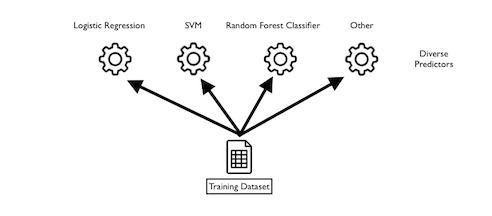

In [ ]:
Final_RF_model = RandomForestClassifier(max_depth = 13,
                                        min_samples_leaf = 12,
                                        min_samples_split = 20,
                                        n_estimators = 300)
Final_LGB_model = LGBMClassifier(learning_rate = 0.2, 
                                 n_estimators =500, 
                                 num_leaves = 17)
Final_CAT_model = CatBoostClassifier(depth=7, 
                                     n_estimators=400, 
                                     l2_leaf_reg=1, 
                                     learning_rate = 0.1)
Fianl_GB_model = GradientBoostingClassifier(learning_rate=1.0,
                                           n_estimators=300)


from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('RF', Final_RF_model), ('LGBM', Final_LGB_model), ('CAT', Final_CAT_model), ('GB', Fianl_GB_model)], voting='soft')
voting_model.fit(tr, tg)

# Ensemble with StackingClassifier

<img src="https://i.ibb.co/zhr5JNM/2022-02-25-144626.jpg" alt="2022-02-25-144626" border="0">

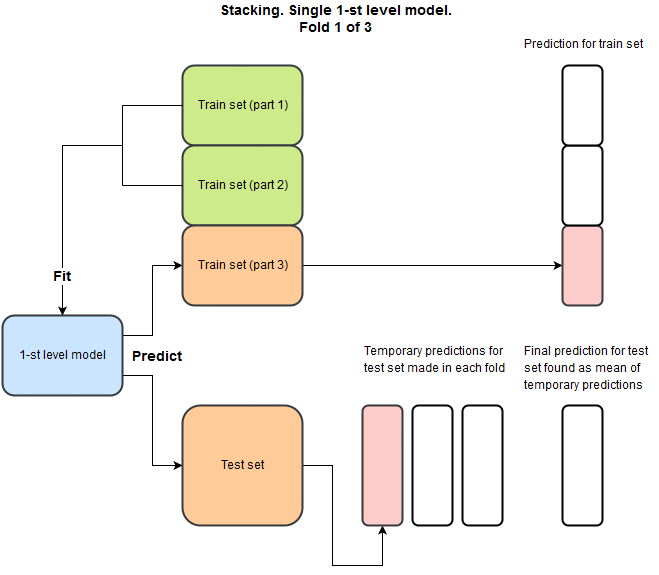

In [ ]:
Final_RF_model = RandomForestClassifier(max_depth = 11,
                                        min_samples_leaf = 19,
                                        min_samples_split = 8,
                                        n_estimators = 300)

Final_LGB_model = LGBMClassifier(learning_rate = 0.2, 
                                 n_estimators =500, 
                                 num_leaves = 17)

Final_CAT_model = CatBoostClassifier(depth=8, 
                                     n_estimators=400, 
                                     l2_leaf_reg=7, 
                                     learning_rate = 0.2)

Fianl_GB_model = GradientBoostingClassifier(learning_rate=0.2,
                                            max_depth=3,
                                           n_estimators=400)

from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=[('RF', Final_RF_model), ('LGBM', Final_LGB_model), ('CAT', Final_CAT_model), ('GB', Fianl_GB_model)])
stacking_model.fit(tr, tg)

In [ ]:
# Voting

# pred = voting_model.predict(test_df)
# pred = pred.reshape(len(pred), 1)
# vot_pred = label_encoder.inverse_transform(pred)
# vot_pred = vot_pred.reshape(len(vot_pred),)

# Stacking
pred = stacking_model.predict(test_df)
pred = pred.reshape(len(pred), 1)
vot_pred = label_encoder.inverse_transform(pred)
vot_pred = vot_pred.reshape(len(vot_pred),)


# submit
submission = pd.DataFrame({
    'PassengerId' : sub_id,
    'Transported' : vot_pred
})
submission.to_csv('submission_stacks.csv', index = False)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background-image:url("https://storage.googleapis.com/kaggle-competitions/kaggle/34377/logos/header.png?t=2022-02-11-21-53-06"); border:0' role="tab" aria-controls="home">
<left><font size = '6'>Reference Link</font></left></h3>

# Reference
- https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook
- https://www.kaggle.com/kalelpark/herbarium2022-eda-with-pytorch
- https://www.kaggle.com/drcapa/spaceship-titanic-starter
- https://www.kaggle.com/c/spaceship-titanic/discussion/309535
- https://seaborn.pydata.org/examples/index.html
- https://pycaret.gitbook.io/docs/
- https://www.kaggle.com/ihelon/titanic-hyperparameter-tuning-with-gridsearchcv
- https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
- https://www.kaggle.com/ohseokkim/titanic-hey-machine-tell-me-everything
- https://en.wikipedia.org/wiki/Anomaly_detection
- https://pycaret.readthedocs.io/en/latest/api/anomaly.html